<a href="https://colab.research.google.com/github/jtsuvile/pink-programming-workshops/blob/main/Generative_art_in_R_workshop_shorter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Your friendly intro to creating generative art with R

# Setting up your R environment

Before starting, please make sure you are in an "R runtime". To check this go to Runtime -> Change runtime type. A little box with details about your runtime pops up. Runtime type should say "R". Don't change anything, just close the dialogue by clicking 'cancel'.

You should run the cells below (press shift and enter or click the litte play-button next to the cell) during the intro talk as this will take *a while* to execute. You should execute the cells in order (from top down) to avoid issues. Do this until you hit the text "End of set-up".

In [1]:
system("apt-get -y update")
# R packages have mysterious linux library dependencies and the error messages on colab are uninformative,
# so let us install pretty much anything we could possibly want or need
system("apt-get install -y r-base r-base-dev")
system("apt-get install -y cargo cmake default-jdk fonts-roboto htop libcairo2-dev libclang-dev libcurl4-openssl-dev libfontconfig1-dev libfreetype6-dev libfribidi-dev libgdal-dev libgeos-dev libharfbuzz-dev libjpeg-dev libmagick++-dev libproj-dev libpng-dev libpq-dev libsodium-dev libssl-dev libtiff5-dev libudunits2-dev libx11-dev libxml2-dev openjdk-8-jdk openjdk-8-jre pandoc ttf-mscorefonts-installer xorg-dev")


Next, we install the packages we are using today and their dependencies. Dependencies are other packages that our "main" packages rely on to work properly. This section can take up to 10 mins to run! We'll talk about what packages are and why we need them soon.

In [2]:
install.packages("Rcpp")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
install.packages("aRtsy")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
library(repr)
library(ggplot2)
library(dplyr)
library(aRtsy)
library(stringr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [6]:
# if this cell prints out "ready to do art" then we're good to go!
# you can re-run this cell if you suspect something went wrong to see if things still work as they should
if(system.file(package='aRtsy') != ''){
  print("installations done, ready to do art!")
} else {
  print("something did not go right :(")
}

[1] "installations done, ready to do art!"


In [7]:
# in case you run into issues with installations, code mentors may want to use this to check what is happening
# will output information about the current R session and packages
# sessionInfo()

## End of set-up!


# Functions and arguments

We'll start our plotting journey by working on a function that creates watercolor-like patterns. This function is part of a package called aRtsy. What the function does is that it takes some polygons (squares, triangles etc) and warps them a little bit and repeats this a number of times so that it looks like the polygons get a watercolor-y soft edge.

Packages often have documentation related to the functionality that is available. This function has documentation [here](https://koenderks.github.io/aRtsy/reference/canvas_watercolors.html).

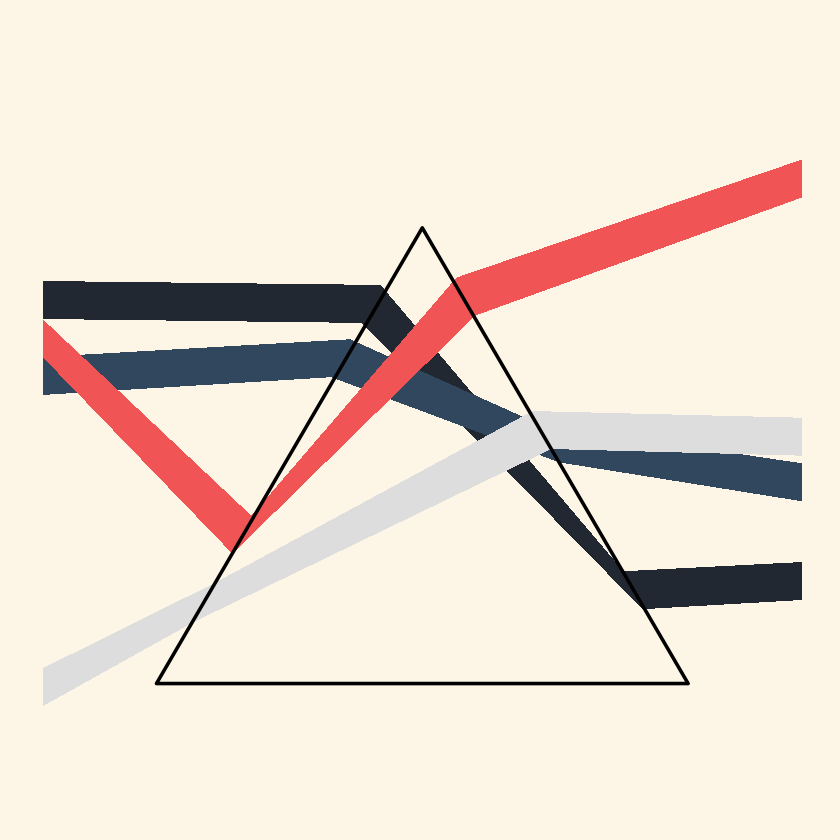

In [85]:
# the main function is called canvas_flame()
# it needs an argument called colors that gives it a list of colors that will be used in the plot
# we get the list of colors from another function, called "colorPalette"
# you will get a chance to try out different palettes soon!
canvas_ribbons(colors = colorPalette("retro2"))

Now let's try to change the plot to use another color palette (you can find a list of available palettes [here](https://koenderks.github.io/aRtsy/index.html#color-palettes)).

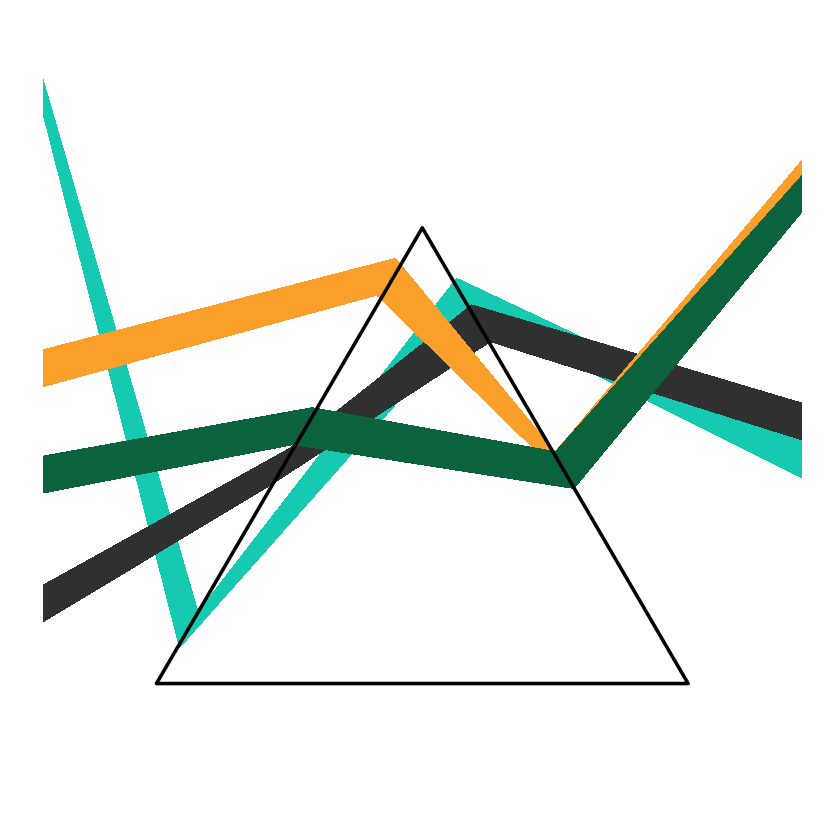

In [88]:
# notice how the name of the palette has quotes (both "" and '' work) around it?
# This is important to make sure the code understands that this is a name, not something called a variable
canvas_ribbons(colors = colorPalette("mixer1"), background = "white")

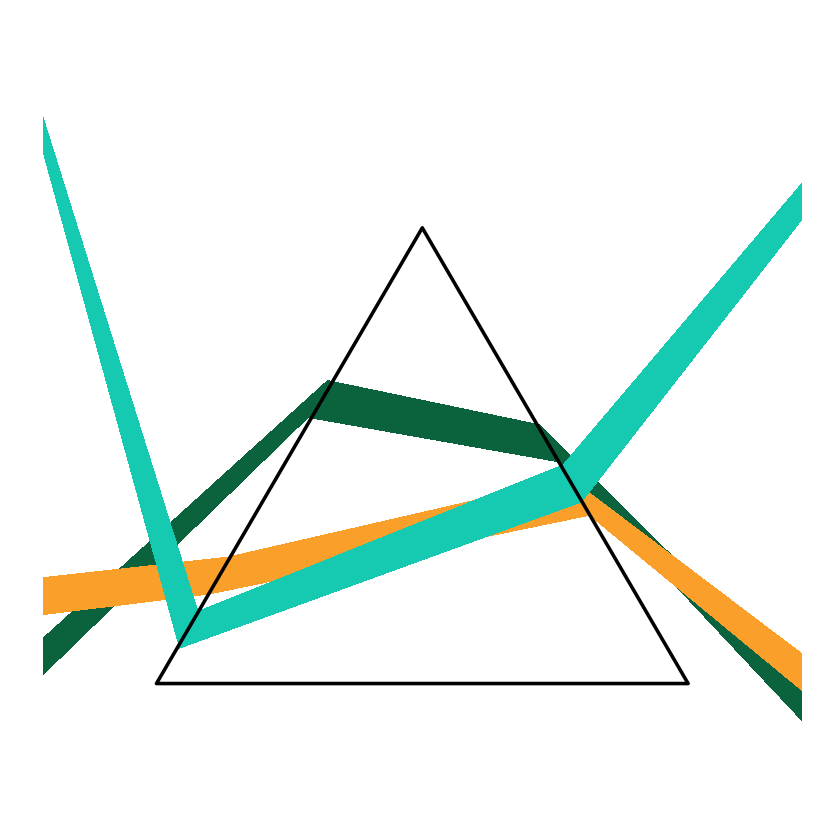

In [89]:
# we can control the number of lines that appear by asking the function
# colorPalette() for a specific number of colors.
# Notice that the number of colors should not have quotes around it!
canvas_ribbons(colors = colorPalette("mixer1", 3), background = "white")

We can choose if we want the triangle to be a part of the plot or not by setting the value of the argument "triangle" to "FALSE" (meaning you do not want a triangle) or TRUE (we want the triangle).

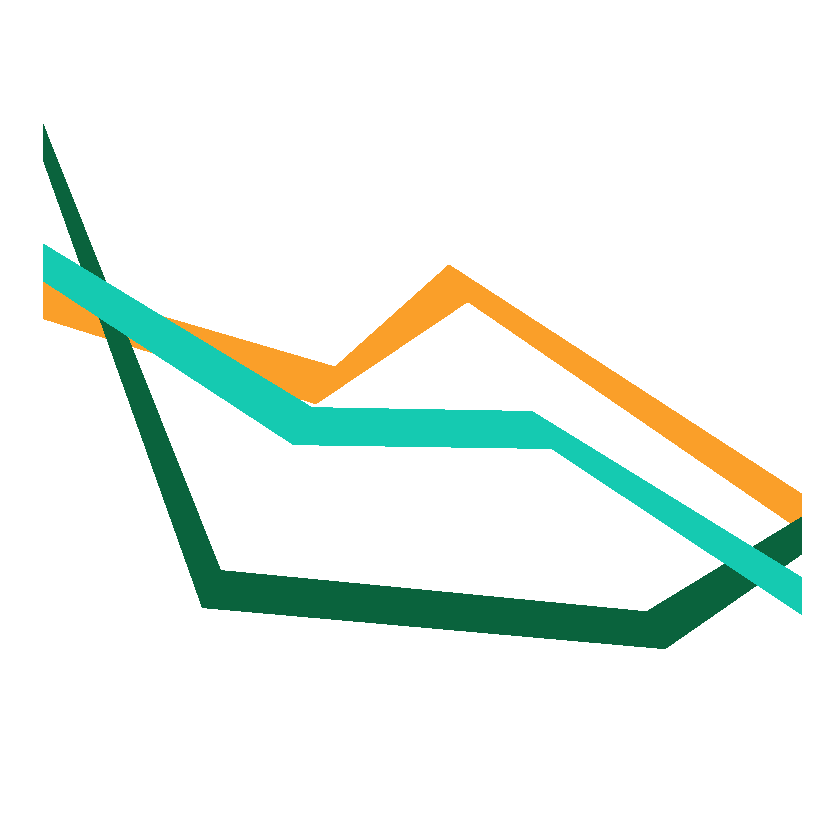

In [90]:
canvas_ribbons(colors = colorPalette("mixer1", 3), background = "white", triangle = FALSE)

In [91]:
# ggave() is a function that saves the plot you most recently generated to your google colab runtime
# the argument it takes is a filename, including file ending, that you want to use to save your creation
# remember to download your plots from colab before you leave this workshop! otherwise they may disappear :(
ggsave('pretty_plot_1.png')

Saving 6.67 x 6.67 in image


# Other plot types

In this section, we'll take a look at a few different functions we can use to draw different types of art. You can then choose which type of art you like the best and start developing it further!

## Meshes
See more information about the arguments [here](https://koenderks.github.io/aRtsy/reference/canvas_mesh.html).

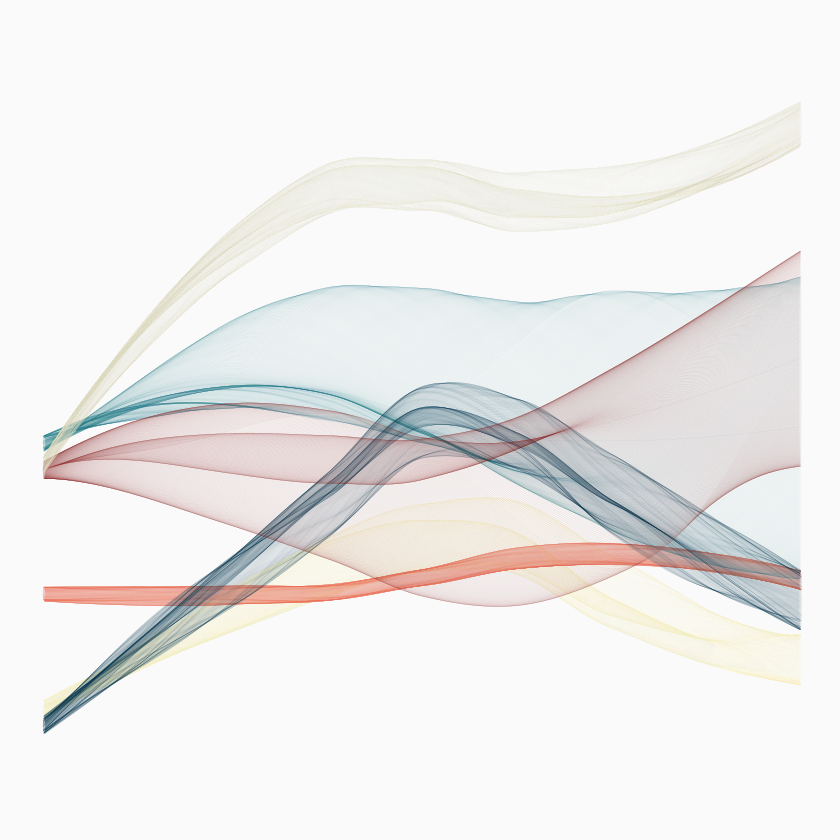

In [92]:
canvas_mesh(colors = colorPalette("origami"))

## Functions
See more information about the arguments [here](https://koenderks.github.io/aRtsy/reference/canvas_function.html).

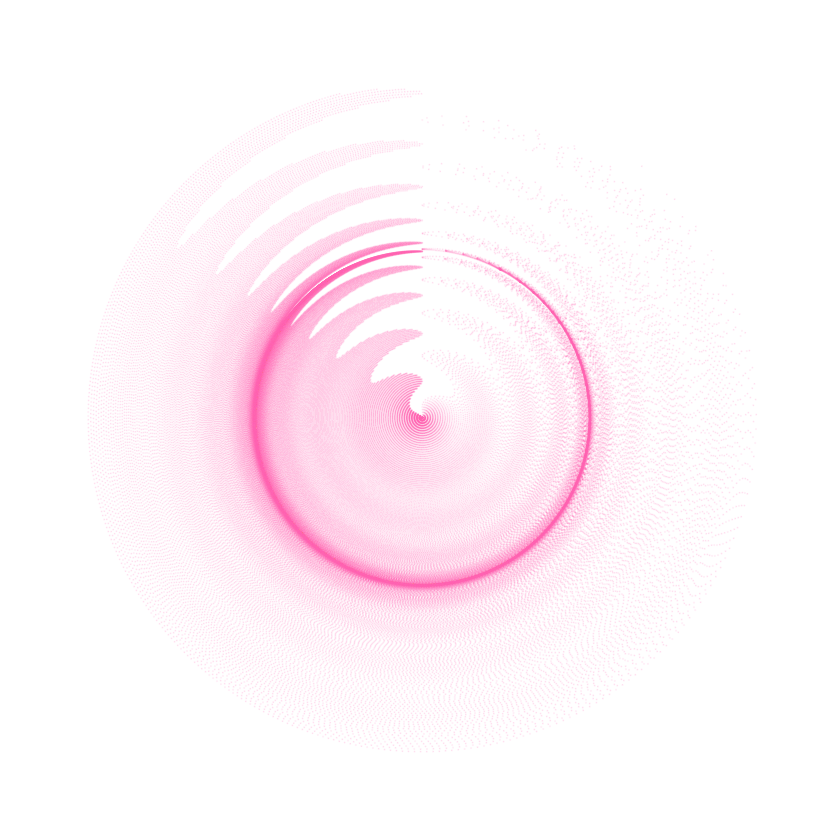

In [93]:
canvas_function(colors = "hotpink", background = "white")

## Nebula
See more information about the arguments [here](https://koenderks.github.io/aRtsy/reference/canvas_nebula.html).

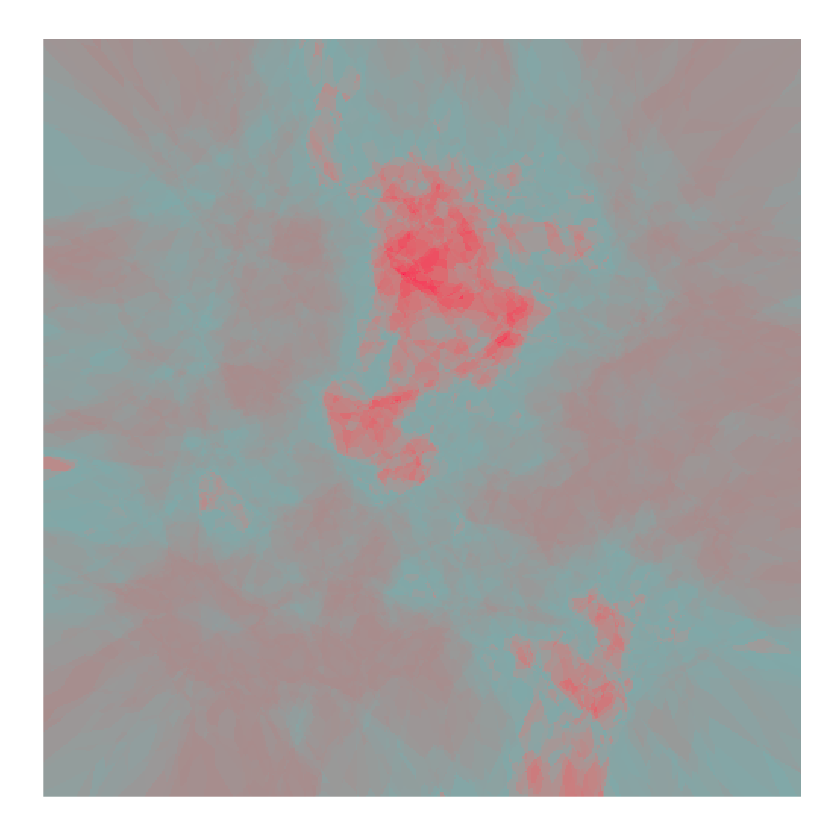

In [94]:
canvas_nebula(colors = colorPalette("retro4"))

## Segments
See more information about the arguments [here](https://koenderks.github.io/aRtsy/reference/canvas_segments.html).

Warning message:
“Removed 2 rows containing missing values (`geom_segment()`).”


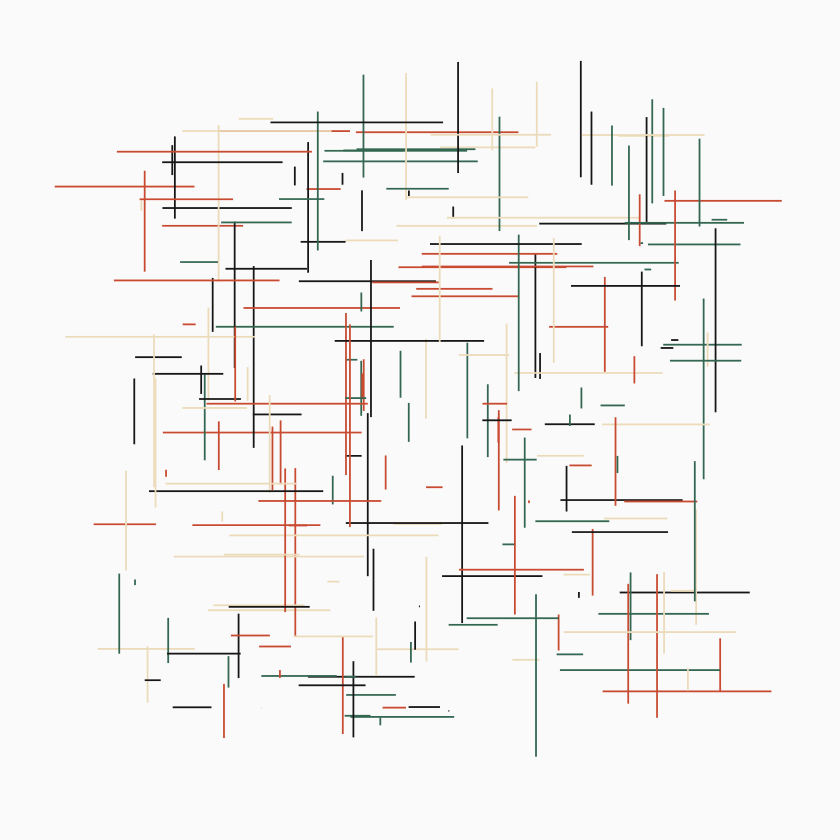

In [95]:
canvas_segments(colors = colorPalette("dark1"), size = 0.5, H = 0.15)

# Brief theory interlude


# Refine your chosen plot
Pick one of the plots above that you liked, and copy its command under the comment "change this next line". The new my_seed variable will make it easier for you to keep working on exactly the same plot once you see something you love. Also, now your plot gets saved every time you run the cell! Try to at least change colors (you can find a list of available color palettes [here](https://koenderks.github.io/aRtsy/index.html#color-palettes) and a list of color names that you can use if you want a single color [here](http://sape.inf.usi.ch/quick-reference/ggplot2/colour)). Remember that you need to have quotes (" " or ' ') around the name of the palette or color, otherwise R will get confused.

[1] 8264


Saving 6.67 x 6.67 in image


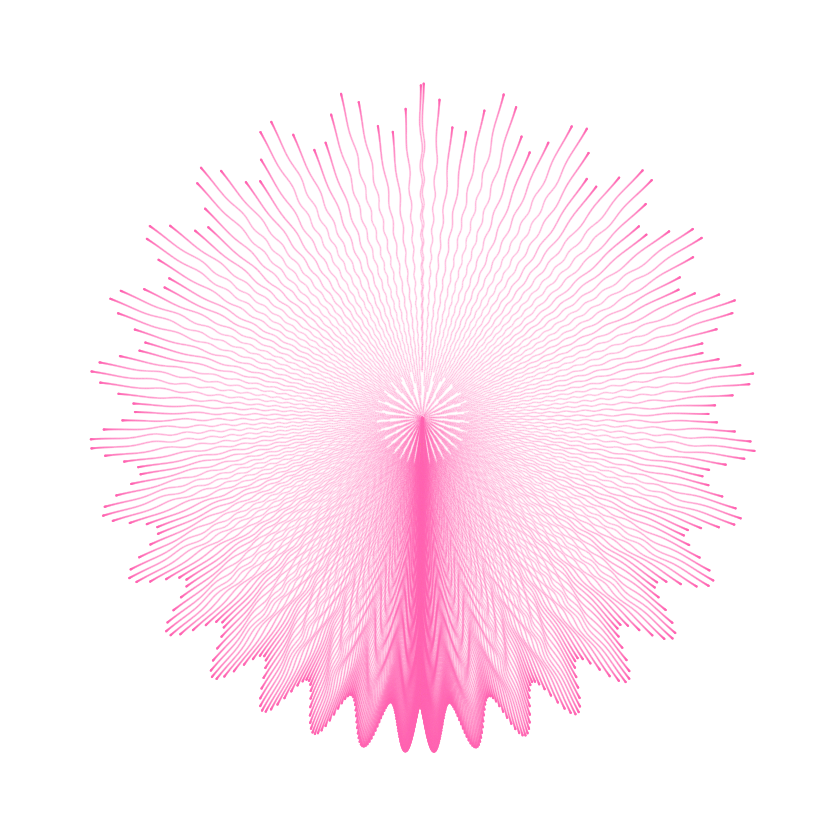

In [72]:
# we're creating a variable to hold our random seed and picking a number at random for it
my_seed <- round(runif(1, 0, 10000))
# set the random seed (needs to be done in each cell you want to use it!)
set.seed(my_seed)
# print the seed in case we really loved our plot want to continue to work with it
print(my_seed)

# change this next line to have your preferred function and colors
canvas_function(colors = "hotpink", background = "white")

ggsave(str_c('my-favorite-function-',my_seed,'.png'))

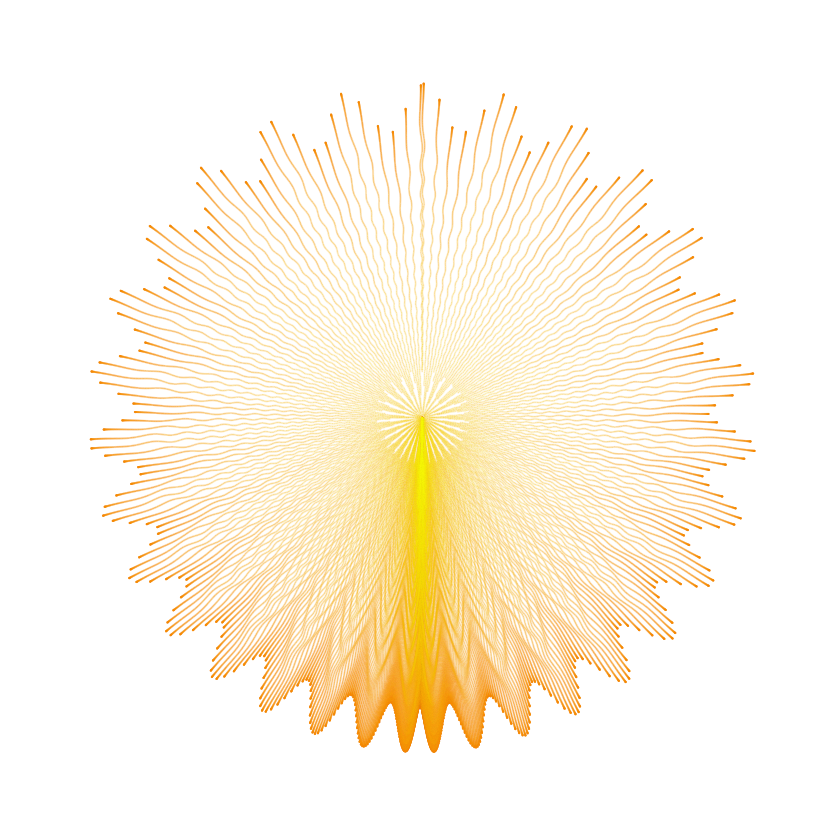

In [73]:
# I really liked my plot when the seed was 8264.
# This is how I can keep working on exactly the same figure
# assign my new favorite seed to my_seed
my_seed <- 8264
# set the random seed (needs to be done in each cell you want to use it!)
set.seed(my_seed)

# change this next line to have your preferred function and colors
canvas_function(colors = colorPalette("neon1"), background = "white")

# save the output in a bigger file so I can share it with the world!
ggsave(str_c('my-favorite-function-',my_seed,'.png'), width=12, height=12)

Now it's time to keep experimenting! Pick another plot type from the [aRtsy package homesite](https://koenderks.github.io/aRtsy/index.html) and try to make the corresponding plot. Try first with the same exact settings that are listed on the homepage and then start making it your own with changing parameters etc.

In [ ]:
# you can experiment in this cell!
# first we explicitly set the random seed
my_seed <- round(runif(1, 0, 10000))
set.seed(my_seed)

#
# your plotting code goes here
#

# save the output together with the seed
ggsave(str_c('my-awesome-plot-',my_seed,'.png'))

I would love to see your plot(s)! Please share them with the world 😍

# Additional resources
Here's a number of tutorials and additional resources where you can find more information about generative art using R. This list is by no means exhaustive and if this workshop was your first encounter with coding, some of them may be a bit tricky to follow but many of them are very beginner friendly. If you know of good resources that aren't mentioned here, please share them on Slack!

## Resources for learning R
- [Data science in R, a gentle introduction](https://bookdown.org/jgscott/DSGI/)
- [R for the rest of us](https://rfortherestofus.com/courses/getting-started/)
- [The big book of R, especially the New to R? section](https://www.bigbookofr.com/index.html)
- [R for data science (free ebook)](https://r4ds.had.co.nz/)
- [YaRrr! The pirate's guide to R](https://bookdown.org/ndphillips/YaRrr/)
- [Exploratory data analysis with R](https://bookdown.org/rdpeng/exdata/)
- [Data Visualisation in R (course materials)](https://data-vis-2021.djnavarro.net/materials/)


## Resources for generative art
- [materials from Danielle Navarro's "ART FROM CODE" workshop](https://art-from-code.netlify.app/)
- [Danielle Navarro's list of generative art resources](https://blog.djnavarro.net/posts/2021-10-19_rtistry-posts/)
- [materials from Ijeamaka Anyene's talk on generative art](https://github.com/Ijeamakaanyene/anatomy_of_generative_art)
- [a brief introduction to couple of different packages for generative art](https://towardsdatascience.com/getting-started-with-generative-art-in-r-3bc50067d34b)

## Inspiration and packages for generative art
- [nrennie/aRt](https://nrennie.rbind.io/portfolio/rtistry/)
- [ambient](https://ambient.data-imaginist.com/)
- [Pierre Casadebaigs repository with art](https://github.com/picasa/generative_examples)
- [Mystery curves](https://georgemsavva.github.io/creativecoding/posts/mystery/)
- [Thomas Lin Pedersen art](https://www.data-imaginist.com/art)
- [Danielle Navarro art](https://art.djnavarro.net/)
- [Marcus Volz art](https://marcusvolz.com/#generative-art)
- [Jacquie Tran art](https://art.jacquietran.com/)
